In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
df_item = pd.read_csv('../data/raw/ml-100k/u.item', sep='|', names=['movie_id', 'movie_title', 'release_date', 'video release date',
              'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film_Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi',
              'Thriller', 'War', 'Western'] , encoding='latin-1')

In [17]:
df_item.head()

,movie_id,movie_title,release_date,video release date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
df_user = pd.read_csv('../data/raw/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'] , encoding='latin-1')

In [19]:
df_user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [20]:
df_data = pd.read_csv('../data/raw/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'], encoding='latin-1')

In [21]:
df_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [22]:
# Display general information about each dataframe
print("Item DataFrame:")
print(df_item.info())

print("\nUser DataFrame:")
print(df_user.info())

print("\nData DataFrame:")
print(df_data.info())


Item DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   movie_title         1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb_URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children            1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film_Noir           1682 non-null   int

In [23]:
# Check for null values in each dataframe
print("Null values in df_item:")
print(df_item.isnull().sum())

print("\nNull values in df_user:")
print(df_user.isnull().sum())

print("\nNull values in df_data:")
print(df_data.isnull().sum())


Null values in df_item:
movie_id                 0
movie_title              0
release_date             1
video release date    1682
IMDb_URL                 3
unknown                  0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film_Noir                0
Horror                   0
Musical                  0
Mystery                  0
Romance                  0
Sci_Fi                   0
Thriller                 0
War                      0
Western                  0
dtype: int64

Null values in df_user:
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

Null values in df_data:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


In [24]:
df_item['release_date'] = pd.to_datetime(df_item['release_date'], format='%d-%b-%Y')

# Convert 'release_date' to Unix seconds
df_item['release_unix'] = (df_item['release_date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

df_item.drop('video release date', axis=1, inplace=True)
df_item.drop('release_date', axis=1, inplace=True)

In [25]:
df_item.head()

,movie_id,movie_title,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,Crime,...,Film_Noir,Horror,Musical,Mystery,Romance,Sci_Fi,Thriller,War,Western,release_unix
0,1,Toy Story (1995),http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,788918400.0
1,2,GoldenEye (1995),http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,788918400.0
2,3,Four Rooms (1995),http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,788918400.0
3,4,Get Shorty (1995),http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,788918400.0
4,5,Copycat (1995),http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,788918400.0


In [26]:
df_item['release_unix'].fillna(df_item['release_unix'].mean(), inplace=True)

In [27]:
# Check for null values in each dataframe
print("Null values in df_item:")
print(df_item.isnull().sum())

print("\nNull values in df_user:")
print(df_user.isnull().sum())

print("\nNull values in df_data:")
print(df_data.isnull().sum())

Null values in df_item:
movie_id        0
movie_title     0
IMDb_URL        3
unknown         0
Action          0
Adventure       0
Animation       0
Children        0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film_Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci_Fi          0
Thriller        0
War             0
Western         0
release_unix    0
dtype: int64

Null values in df_user:
user_id       0
age           0
gender        0
occupation    0
zip_code      0
dtype: int64

Null values in df_data:
user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


In [28]:
# Display summary statistics for numerical columns
print("User DataFrame Summary Statistics:")
print(df_user.describe())

print("\nData DataFrame Summary Statistics:")
print(df_data.describe())


User DataFrame Summary Statistics:
          user_id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

Data DataFrame Summary Statistics:
            user_id        item_id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08


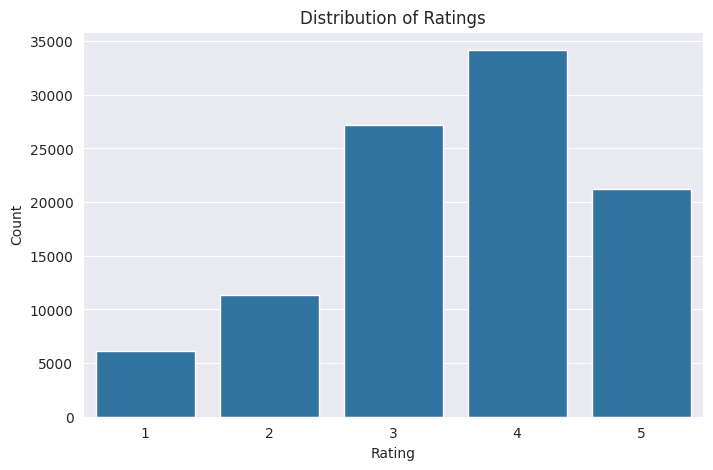

In [29]:
# Plot the distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df_data)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

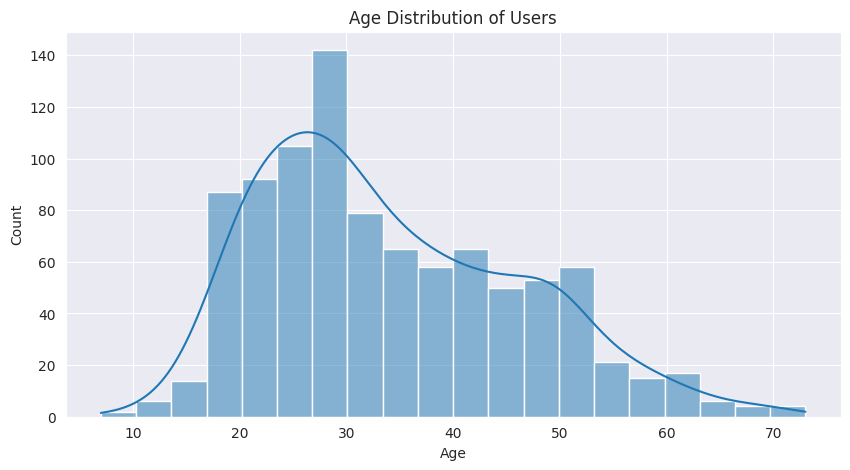

In [30]:
# Plot the age distribution of users
plt.figure(figsize=(10, 5))
sns.histplot(df_user['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

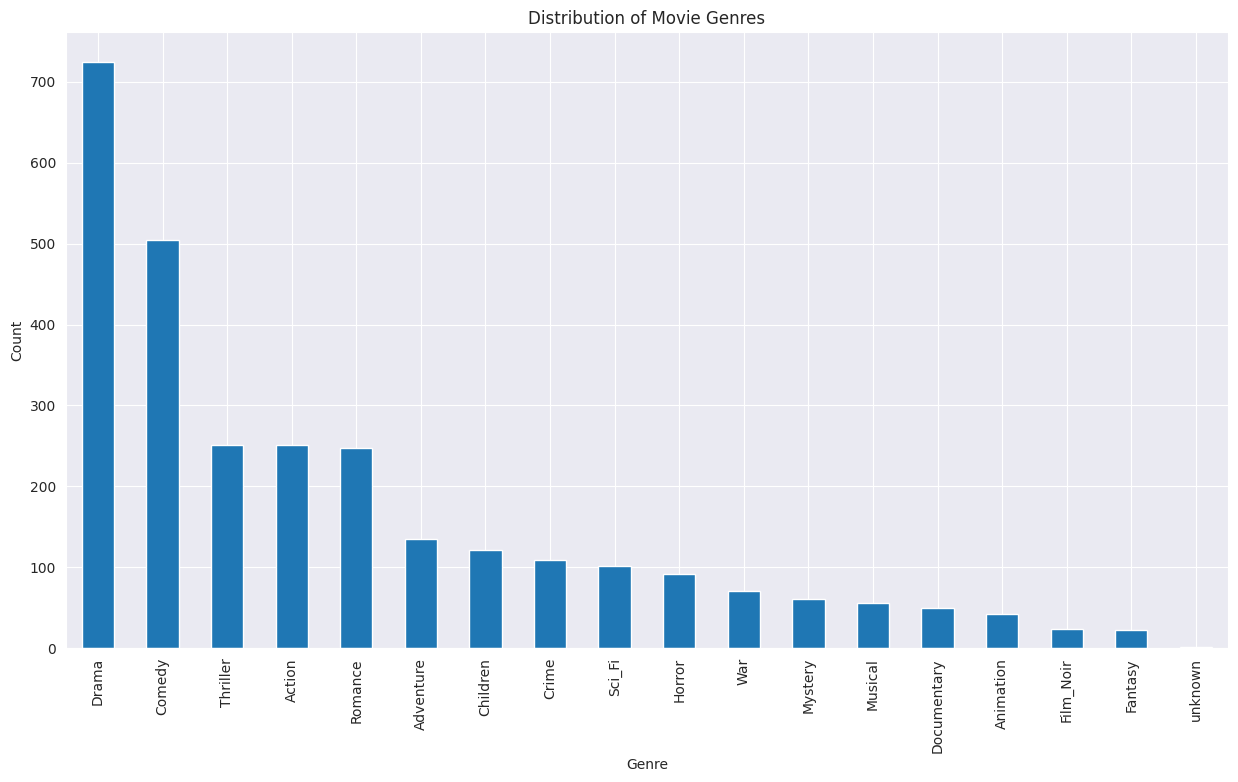

In [32]:
# Calculate the total count of each genre
genre_counts = df_item.iloc[:, 3:21].sum()

# Plot the distribution of movie genres
plt.figure(figsize=(15, 8))
genre_counts.sort_values(ascending=False).plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [33]:
# Merge dataframes on common columns
df_merged = pd.merge(df_data, df_user, on='user_id')
df_merged = pd.merge(df_merged, df_item, left_on='item_id', right_on='movie_id')

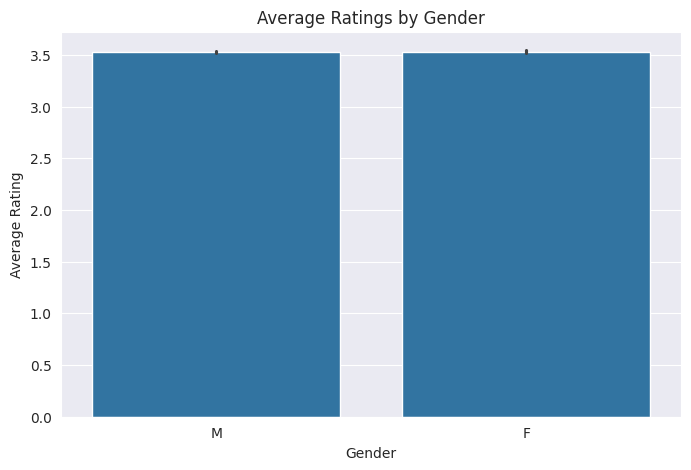

In [34]:
# Plot the average ratings by gender
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='rating', data=df_merged)
plt.title('Average Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Rating')
plt.show()

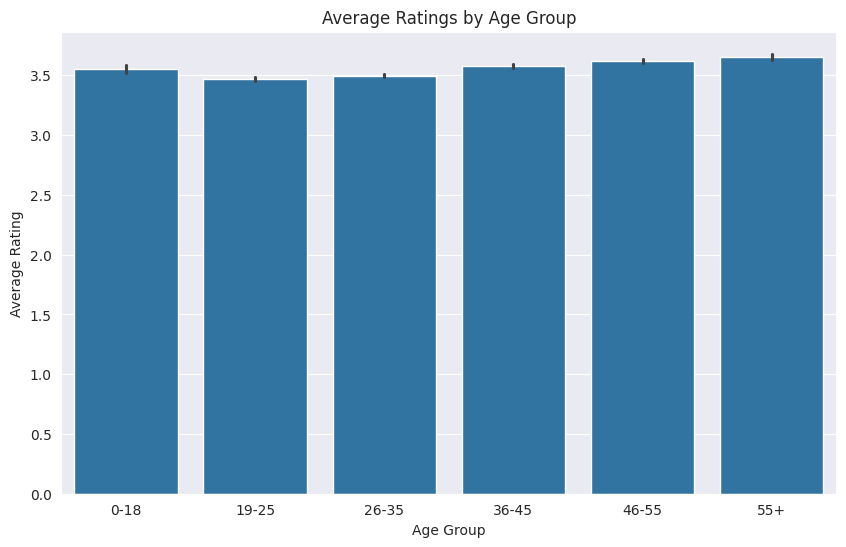

In [35]:
# Create age groups
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55+']
df_merged['age_group'] = pd.cut(df_merged['age'], bins=age_bins, labels=age_labels)

# Plot the average ratings by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='rating', data=df_merged)
plt.title('Average Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()

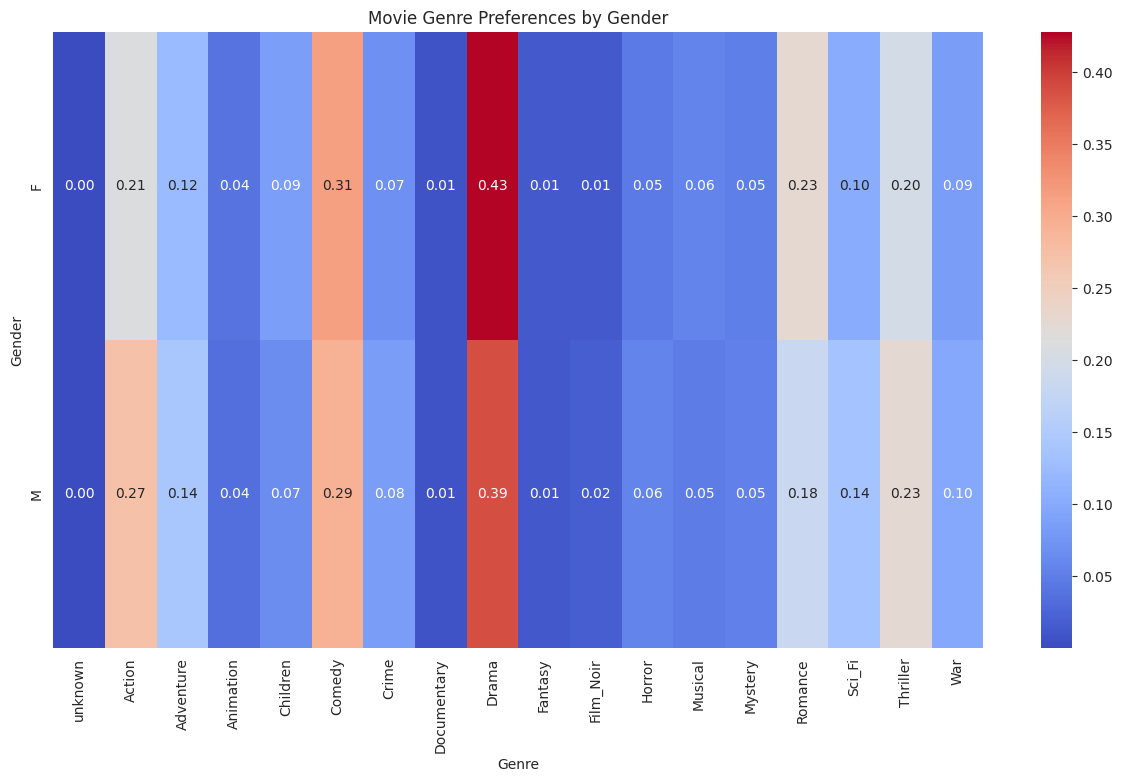

In [36]:
# Calculate the average ratings for each genre by gender
genre_columns = df_item.columns[3:21]
genre_ratings_by_gender = df_merged.groupby('gender')[genre_columns].mean()

# Plot the genre preferences by gender
plt.figure(figsize=(15, 8))
sns.heatmap(genre_ratings_by_gender, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Movie Genre Preferences by Gender')
plt.xlabel('Genre')
plt.ylabel('Gender')
plt.show()

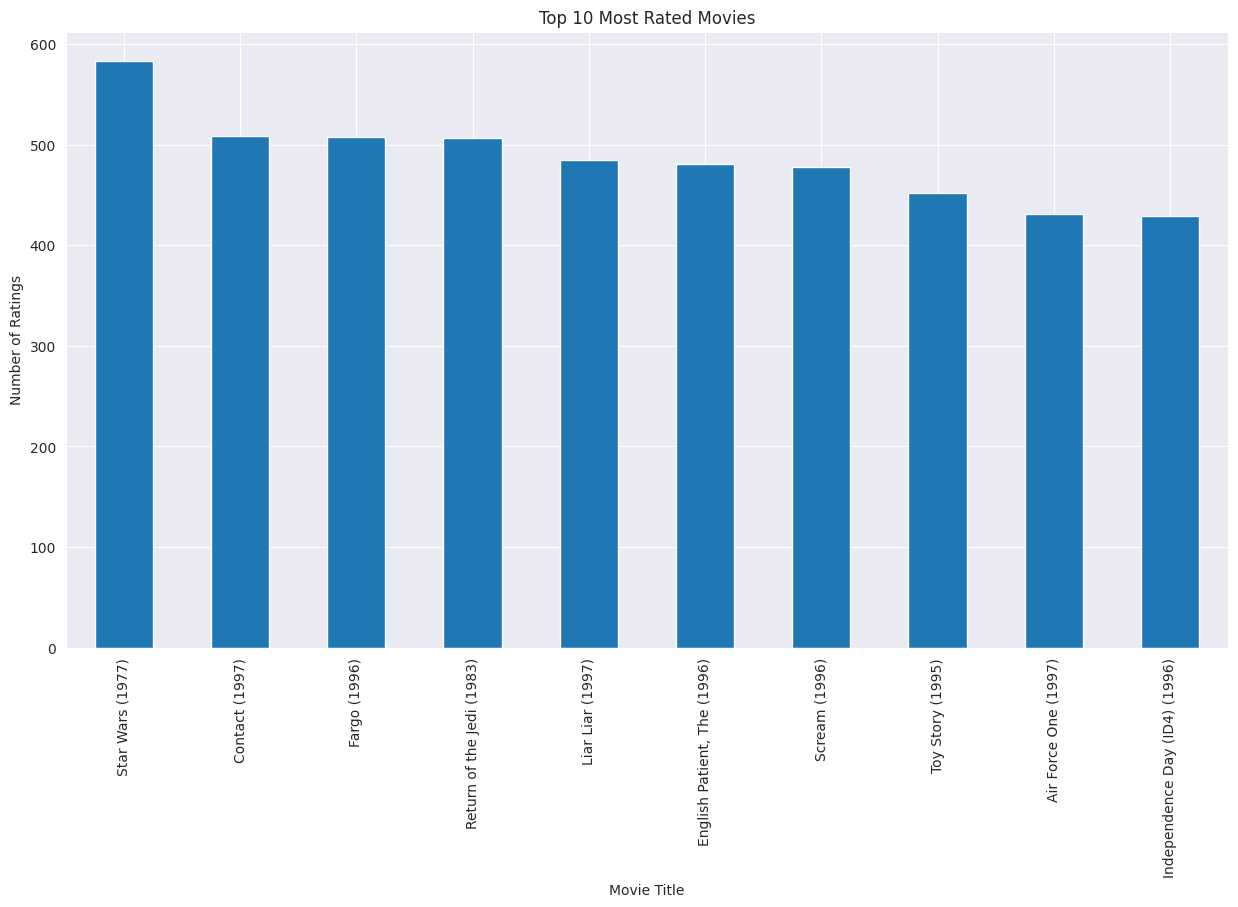

In [37]:
# Identify and plot the most rated movies
most_rated_movies = df_merged.groupby('movie_title')['rating'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(15, 8))
most_rated_movies.plot(kind='bar')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.show()

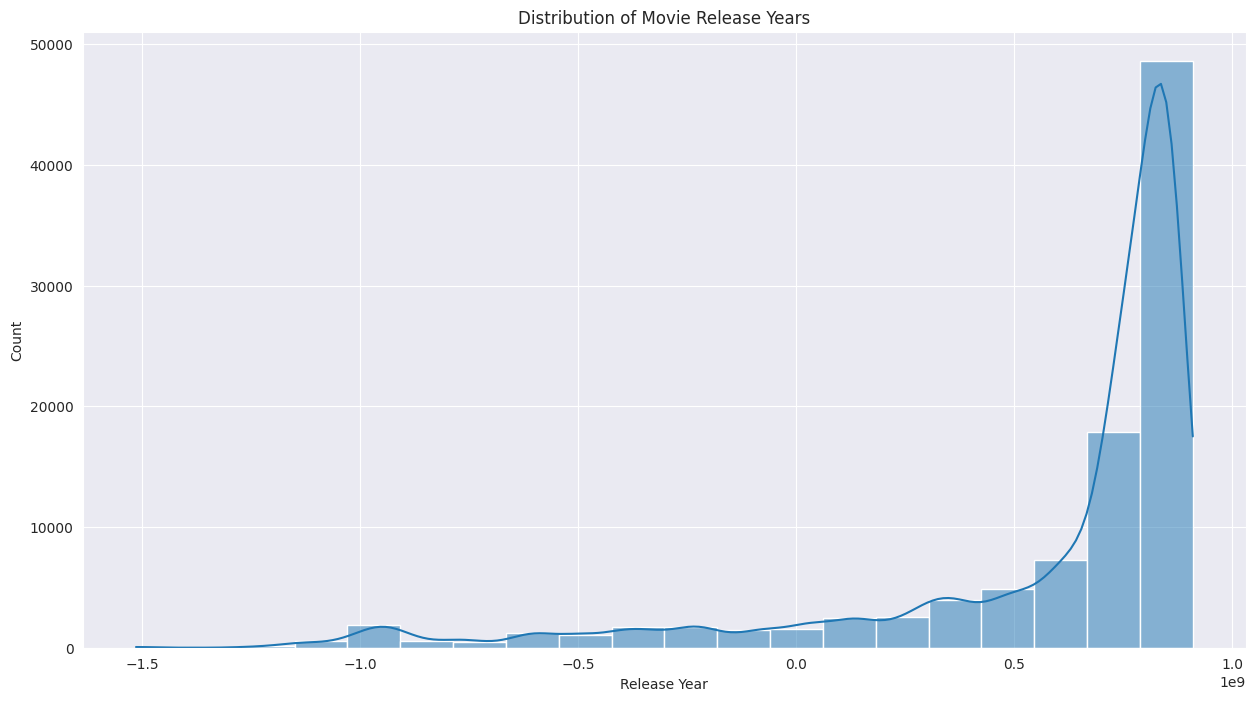

In [38]:
# Plot the distribution of movie release years
plt.figure(figsize=(15, 8))
sns.histplot(df_merged['release_unix'], bins=20, kde=True)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

In [39]:
df_merged.to_csv(os.path.join('../data/interim/data.csv'), index=False)